# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to uncover insights, patterns/correlations in a data.
In this tutorial, we will be using a popular housing data to carry out our analysis. The data is saved as a CSV file (Dataset.csv) in our working directory.

### Step 1: Data Loading, Visualisation & Exploration

#### Importing the necessary modules

In [17]:
import pandas as pd                  ## For data management
import numpy as np                   ## Array creation 

# For plotting charts 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
df = pd.read_csv("housing data.csv")

#### Viewing the Dataset

In [22]:
df.head()
#Note that, by default the head function returns the first 5 rows of the dataframe. 
#To retun more number of rows, you add the number of rows as an argument to the head function.
#Eg df.head(15) returns the first 15 rows of the data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,NaN,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,NaN,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,NaN,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


#### Viewing the Dimension of the data

In [4]:
df.shape

(20640, 10)

#### Viewing the attributes of the features

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20636 non-null float64
latitude              20636 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


#### Displaying the descriptive statistics of each feature

I do not want the GIS coordinates (latitude and lungitude) and the categorical variables included in the descriptive statistics (ocean_proximity. <br>
This can be done by excluding them. See below:

In [24]:
#df['ocean_proximity'].value_counts()

In [26]:
#sns.countplot(df['ocean_proximity'])

In [8]:
main_data = df[df.columns.difference(['longitude', 'latitude'])]

In [9]:
main_data.head()

,households,housing_median_age,median_house_value,median_income,ocean_proximity,population,total_bedrooms,total_rooms
0,126,41,452600,8.3252,NEAR BAY,322,129.0,880
1,1138,21,358500,8.3014,NEAR BAY,2401,1106.0,7099
2,177,52,352100,7.2574,NEAR BAY,496,190.0,1467
3,219,52,341300,5.6431,NEAR BAY,558,235.0,1274
4,259,52,342200,3.8462,NEAR BAY,565,280.0,1627


In [10]:
young_data = df[(df['housing_median_age'] <= 30) & (df['ocean_proximity'] == 'NEAR BAY')]

In [11]:
young_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19067,-122.45,38.28,20,3306,503.0,1374,460,5.7984,297600,NEAR BAY
19068,-122.47,38.29,14,3732,846.0,1277,775,2.5658,208000,NEAR BAY
19069,-122.45,38.27,25,5024,881.0,1994,838,4.2237,262300,NEAR BAY
19077,-122.49,38.27,8,5092,988.0,1657,936,3.5625,213200,NEAR BAY
19104,-122.51,38.17,8,5875,1115.0,2808,1029,3.6392,246300,NEAR BAY


In [12]:
reduced1 = df[df.columns.difference(['longitude', 'latitude','ocean_proximity'])]
reduced1.describe()

,households,housing_median_age,median_house_value,median_income,population,total_bedrooms,total_rooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,499.539680,28.639486,206855.816909,3.870671,1425.476744,537.870553,2635.763081
std,382.329753,12.585558,115395.615874,1.899822,1132.462122,421.385070,2181.615252
min,1.000000,1.000000,14999.000000,0.499900,3.000000,1.000000,2.000000
25%,280.000000,18.000000,119600.000000,2.563400,787.000000,296.000000,1447.750000
50%,409.000000,29.000000,179700.000000,3.534800,1166.000000,435.000000,2127.000000
75%,605.000000,37.000000,264725.000000,4.743250,1725.000000,647.000000,3148.000000
max,6082.000000,52.000000,500001.000000,15.000100,35682.000000,6445.000000,39320.000000


#### Let's look at the Age distribution of the population

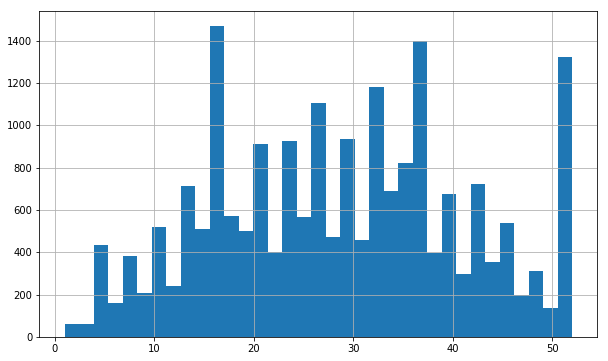

In [13]:
plt.figure(figsize = (10, 6))
df['housing_median_age'].hist(bins = 35)
# We can deduce from here that a larger percent of the population are arround age, 15.

#### Let's compare the average income of the youths and the average income of the elderly ones

In [16]:
average_income_youth = df[df['housing_median_age'] <= 35]['median_income'].mean()

In [17]:
average_income_youth

3.9864887031337557

In [18]:
average_income_elderly = df[df['housing_median_age'] > 35]['median_income'].mean()
average_income_elderly

3.6096795397225705

In [22]:
# From above, we can conclude that both the youths and the elderly ones earns
# approximately the same income

#### Indexing and retrieving data

To get a single or multiple columns from the data we simply index the Dataframe with</br>
the name of the column or columns.

In [23]:
df['total_rooms'].head(10)

0     880
1    7099
2    1467
3    1274
4    1627
5     919
6    2535
7    3104
8    2555
9    3549
Name: total_rooms, dtype: int64

In [24]:
df[['total_rooms', 'households', 'population']].head(10)

,total_rooms,households,population
0,880,126,322
1,7099,1138,2401
2,1467,177,496
3,1274,219,558
4,1627,259,565
5,919,193,413
6,2535,514,1094
7,3104,647,1157
8,2555,595,1206
9,3549,714,1551


#### Visualizing the feature of the data with a box plot

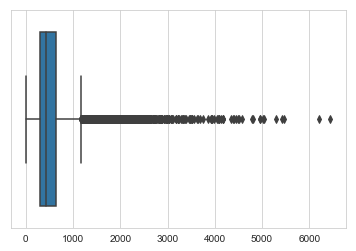

In [25]:
#Household
sns.set_style("whitegrid")
sns.boxplot(x = ['total_bedrooms'], data = df)
#Saving the graph
#plt.savefig("total_bedrooms_Plot1.png", format='png', dpi=300)

In [26]:
df2 = df[df['total_bedrooms'] <= 6000]

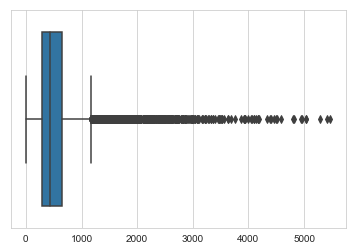

In [27]:
#Household
sns.set_style("whitegrid")
sns.boxplot(x = ['total_bedrooms'], data = df2)
#Saving the graph
#plt.savefig("total_bedrooms_Plot1.png", format='png', dpi=300)

The above box plot shows us some inconsistency in the data. We can deduce that </br>
houses whose total bedroom is greater that 6000 are outliers and may not be relevant</br>
to our analysis.

In [ ]:
# population
sns.boxplot(x = ['population'], data = df )
plt.savefig("population.png", format='png', dpi=300)

### Part 2: Working with 911 Call Data

For this Analysis we will be working with 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [27]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [28]:
data = pd.read_csv('call data.csv')

In [34]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the first 5 rows of the data using the head()method **

## Some questions to find answers to:

##### What are the 5 most frequent location where calls came from? 

In [36]:
data['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

## What are the top 5 towns with the higest emergency calls? 

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [38]:
data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [40]:
#data.head(10)

In [41]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [42]:
highest_ems_twn = data[data['Reason'] == 'EMS']

In [45]:
highest_ems_twn['twp'].value_counts().head()

NORRISTOWN      3858
LOWER MERION    3171
ABINGTON        3043
POTTSTOWN       2635
CHELTENHAM      2098
Name: twp, dtype: int64

** Now let's use seaborn to visualize the calls by Reason. **

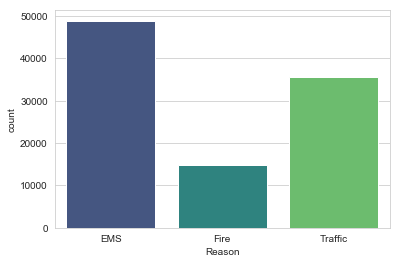

In [179]:
sns.countplot(x='Reason',data= data, palette='viridis')

** Let's extract the date and time information for analysis **

In [10]:
# First, we convert the timestamp column from string to a Datetime object
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [11]:
time = data['timeStamp'].iloc[0]
time.hour

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [12]:
data['Day_of_week'] = data['timeStamp'].apply(lambda time : time.day_name())
data['Month'] = data['timeStamp'].apply(lambda time : time.month_name())
data['Hour'] = data['timeStamp'].apply(lambda time : time.hour)

In [13]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_of_week,Month,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,December,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,December,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,December,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday,December,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday,December,17


In [186]:
data.drop('timeStamp', axis = 1, inplace = True)

In [189]:
#data.head()

## Dropping the timestamp column

In [188]:
data.head()

,lat,lng,desc,zip,title,twp,addr,e,Reason,Day_of_week,Month,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,December,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,December,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,Thursday,December,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday,December,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday,December,17


In [16]:
#keywordsearch(data['title'])

** Notice that the "Day of Week" column is represented in integer format between 0 - 6. Let's use the map() with a dictionary to map the actual string names to the day of the week:**

In [110]:
#day_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#data['Day of Week'] = data['Day of Week'].replace(day_week, inplace = True)

In [ ]:
#data['Day of Week']

In [142]:
#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#data['Day of Week'] = data['Day of Week'].apply(lambda time : time.day_name())

In [144]:
#data['Day of Week']

###### ** Now let's use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

In [ ]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Let's look at the pattern of calls across the year

** First let's create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [ ]:
# Convert Months represented as integers into string equivalent
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'].replace(month_map, inplace = True)
byMonth = df.groupby('Month').count()
byMonth.head()

** Now create a line plot off of the dataframe for the count of calls per month. **

In [ ]:
# Could be any column
byMonth['twp'].plot()

** From the plot above, we can deduce that emergency calls were high January and reduced drastically towards December. **

### Let's look at the pattern of calls for specific date

**First, let's create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [ ]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [ ]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Let's recreate this plot for the different Reasons for the 911 call**

In [ ]:
# Fire
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

In [ ]:
# EMS
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()